Question 1

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import json

{0: 9, 1: 14, 2: 19, 3: 20, 4: 22, 5: 10, 6: 26, 7: 17, 8: 13, 9: 24, 10: 14}
0 : 9
1 : 14
2 : 19
3 : 20
4 : 22
5 : 10
6 : 26
7 : 17
8 : 13
9 : 24
10 : 14
Here 0 occurs 9 times, 1 occurs 14 times, 2 occurs 19 times, 3 occurs 20 times, 4 occurs 22 times, 5 occurs 10 times, 6 occurs 26 times, 7 occurs 17 times, 8 occurs 13 times, 9 occurs 24 times, 10 occurs 14 times,  


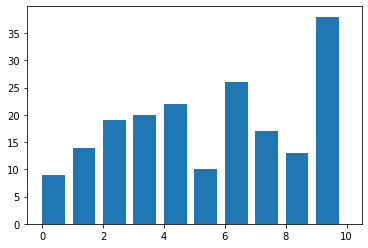

{'0': 9, '1': 14, '2': 19, '3': 20, '4': 22, '5': 10, '6': 26, '7': 17, '8': 13, '9': 24, '10': 14}


In [161]:
file = []
numbers = {}
temp_str = ""

#Reads the file and converts it into a list of integers
f = open("numbers.txt", "r")
str1 = f.read()
for x in range(len(str1)):
    if str1[x]=='\n': 
        file.append(int(temp_str))   #If the next character is a newline, the integer string is appended to list
        temp_str = ""
    elif str1[x]==",":
        file.append(int(temp_str))   #If the next character is a comma, the integer string is appended to the list
        temp_str = ""
    else:
        temp_str = temp_str+str1[x]   #If the next character is an integer, the integer becomes a new string
file.append(int(temp_str))

#Creates a dictionary with the keys as numbers and values as frequencies
num=0
for num in sorted(file):             #Sorts the list so each number can be added in succession
    if num in numbers:
        numbers[num]+=1              #Adds another count to the frequency of the number key
    else:
        numbers[num]=1               #Creates a new key with the value being the count 1
    num+=1
print(numbers)
    
#Prints the numbers with their frequencies as well as an explanation
for keys, values in numbers.items():
    print(keys, ":", values)
print("Here", end=' ')
for keys, values in numbers.items():
    print(keys, "occurs", values, "times,", end=" ")
print(' ')

#Plots a histogram from the file
plt.hist(file, width = 0.75)
plt.show()
    
#Stores the dictionary into a JSON file
with open("./number_frequencies.json", "w") as out:
    json.dump(numbers, out)
print(json.load(open("number_frequencies.json", "r")))

Question 2

In [162]:
import pandas as pd
import math
import statistics as stats
import seaborn as sns

In [163]:
amazon = pd.read_csv('amazon-orders.csv')
amazon

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN
5,04/05/19,112-0000000-0000006,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/08/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$11.99,$0.00,$0.66,$0.00,$0.66,$12.65,Your Name,NaN
6,04/07/19,112-0000000-0000007,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/08/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$38.98,$0.00,$1.65,$0.00,$1.65,$40.63,Your Name,NaN
7,04/08/19,112-0000000-0000008,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/08/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$44.99,$0.00,$0.00,$0.00,$0.00,$44.99,Your Name,NaN
8,04/20/19,112-0000000-0000009,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/21/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$27.30,$0.00,$1.50,$0.00,$1.50,$28.80,Your Name,NaN
9,04/23/19,112-0000000-0000010,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/24/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$37.08,$0.00,$0.00,$0.00,$0.00,$37.08,Your Name,NaN


In [177]:
# Creates a list from the DataFrame series "Order Date"
order_list = amazon["Order Date"].tolist()

# Strips the $ from the values in "Total Charged" and converts the series to a list of floats
money = amazon["Total Charged"].str.strip("$")   # Strip function taken from dir(str)
money_list = money.tolist()
num = 0
money_values = []
while num<len(money_list):
    money_list[num] = float(money_list[num])
    money_values.append(money_list[num])
    num+=1

In [178]:
# Statistical Analysis of the Amazon Data
total = 0
for amounts in money_values:
    total+=amounts
mean = stats.mean(money_values)
stdev = stats.pstdev(money_values)
median = stats.median(money_values)
money_per_day = {order_list[num]: money_values[num] for num in range(len(order_list))}
for keys, values in money_per_day.items():
    if values==max(money_values):
        max_day = keys
    elif values==min(money_values):
        min_day = keys
print(max(money_values))
print("The total amount spent was $", total, "for", len(money_values), "purchases")
print("On average, $", int(mean), "was spent per day on Amazon")
print("The standard deviation of daily spending was $", stdev)
print("The median purchasing amount per day is $", median)
print("The maximum amount spent was", max(money_values), "on", max_day)
print("The minimum amount spent was", min(money_values), "on", min_day)

210.99
The total amount spent was $ 1777.73 for 59 purchases
On average, $ 30 was spent per day on Amazon
The standard deviation of daily spending was $ 36.11274612742874
The median purchasing amount per day is $ 15.95
The maximum amount spent was 210.99 on 07/06/19
The minimum amount spent was 1.04 on 07/30/19


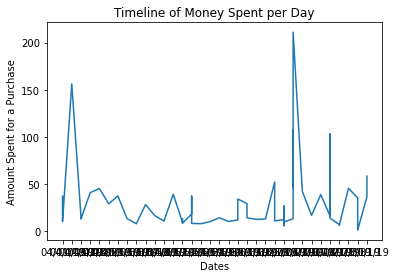

In [179]:
# Analysis of Purchases made in every day on the DataFrame
plt.title("Timeline of Money Spent per Day")
plt.xlabel("Dates")
plt.ylabel("Amount Spent for a Purchase")
plt.plot(order_list, money_values)
plt.show()

In [180]:
dates = pd.to_datetime(order_list)             #Converts list to dates, DateTime Type seen in Pandas3

april = []
april_values = []
may = []
may_values = []
june = []
june_values = []
july = []
july_values = []

num = 0
for element in dates:
    if element.month==4:                        #Uses month of DateTime to create list of dates and values
        april.append(element)
        april_values.append(money_values[num])
        num+=1
    elif element.month==5:                      #Uses month of DateTime to create list of dates and values
        may.append(element)
        may_values.append(money_values[num])
        num+=1
    elif element.month==6:                      #Uses month of DateTime to create list of dates and values
        june.append(element)
        june_values.append(money_values[num])
        num+=1
    else:                                       #Uses month of DateTime to create list of dates and values
        july.append(element)
        july_values.append(money_values[num])
        num+=1

The total amount spent in April was $ 399.17 for 10 purchases
The April mean was about $ 39


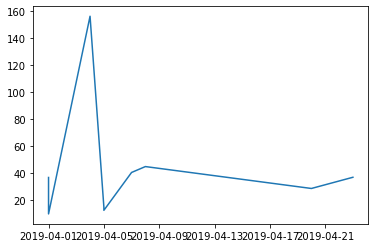

In [181]:
# Monthly Summary for April
asum = 0
for element in april_values:
    asum+=element
print("The total amount spent in April was $", asum, "for", len(april_values), "purchases")
print("The April mean was about $", int(stats.mean(april_values)))
plt.plot(april, april_values)
plt.show()

The total amount spent in May was $ 294.08 for 18 purchases
The May mean was about $ 16


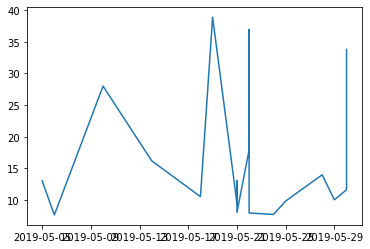

In [182]:
# Monthly Summary for May
msum = 0
for element in may_values:
    msum+=element
print("The total amount spent in May was $", msum, "for", len(may_values), "purchases")
print("The May mean was about $", int(stats.mean(may_values)))
plt.plot(may, may_values)
plt.show()

The total amount spent in June was $ 130.35 for 6 purchases
The June mean was about $ 21


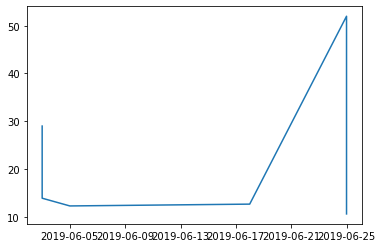

In [183]:
#Monthly Summary for June
jsum1 = 0
for element in june_values:
    jsum1+=element
print("The total amount spent in June was $", jsum1, "for", len(june_values), "purchases")
print("The June mean was about $", int(stats.mean(june_values)))
plt.plot(june, june_values)
plt.show()

The total amount spent in July was about $ 954 for 25 purchases
The July mean was about $ 38


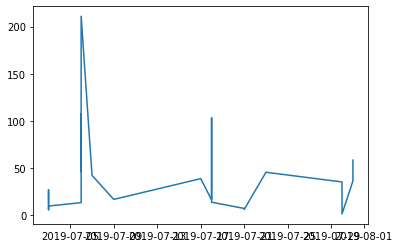

In [184]:
# Monthly Summary for July
jsum2 = 0
for element in july_values:
    jsum2+=element
print("The total amount spent in July was about $", int(jsum2), "for", len(july_values), "purchases")
print("The July mean was about $", int(stats.mean(july_values)))
plt.plot(july, july_values)
plt.show()

In [185]:
months = np.array(['April', 'May', 'June', 'July'])
totals = np.array([asum, msum, jsum1, jsum2])
counts = np.array([len(april), len(may), len(june), len(july)])

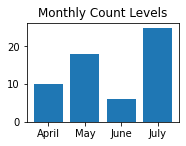

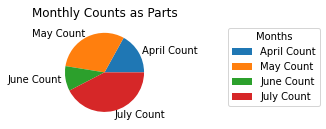

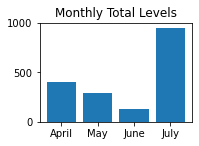

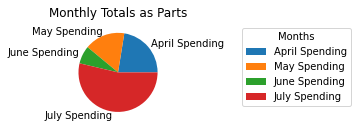

In [186]:
#Bar Chart showing how the amount of purchases per month compare with each other
plt.subplot(2,2,1)
plt.title("Monthly Count Levels")
plt.bar(months, counts)
plt.show()

#Pie Chart showing how the amount of purchases per month compare with the total
plt.subplot(2,2,2)
plt.title("Monthly Counts as Parts")
mylabels1 = np.array(['April Count', 'May Count', 'June Count', 'July Count'])
plt.pie(counts, labels = mylabels1)
plt.legend(title = "Months", bbox_to_anchor = (1.7, 1.0))
plt.show()

#Bar Chart showing how the amount spent per month compares with each other
plt.subplot(2,2,3)
plt.title("Monthly Total Levels")
plt.bar(months, totals)
plt.show()

#Pie Chart showing how the amount spent per month compares with the total
plt.subplot(2,2,4)
plt.title("Monthly Totals as Parts")
mylabels2 = np.array(['April Spending', 'May Spending', 'June Spending', 'July Spending'])
plt.pie(totals, labels = mylabels2)
plt.legend(title = "Months", bbox_to_anchor = (1.7, 1.0))
plt.show()

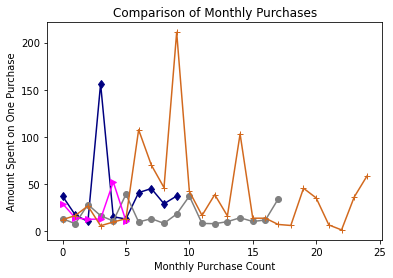

In [187]:
# Creates multiline graph showing every purchase for every month, marked by different markers
plt.xlabel("Monthly Purchase Count")
plt.ylabel("Amount Spent on One Purchase")
plt.title("Comparison of Monthly Purchases")
plt.plot(april_values, color = "navy", marker = 'd')
plt.plot(may_values, color = "grey", marker = 'o')
plt.plot(june_values, color = "magenta", marker = '>')
plt.plot(july_values, color = "chocolate", marker = '+')
plt.show()